# Advanced ML Project EDA

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('../train_competition_2026.csv')
df.head()

,obs,sub_id,time,num_0,num_1,num_2,cat_0,cat_1,cat_2,cat_3,cat_4,t_0,t_1,t_2,t_3,t_4,y_1,y_2
0,0,0,2068-09-19 23:34:11,1.38,49,7,1,3,1,0,1,105.5,95.0,67.4,36.6,23.2,33.4,107.4
1,0,0,2068-09-19 23:35:11,1.38,49,7,1,3,1,0,1,104.4,95.0,66.4,37.8,22.7,33.4,107.4
2,0,0,2068-09-19 23:36:11,1.38,49,7,1,3,1,0,1,104.0,95.0,65.2,37.0,22.1,33.4,107.4
3,0,0,2068-09-19 23:37:11,1.38,49,7,1,3,1,0,1,102.8,95.0,63.4,35.9,20.7,33.4,107.4
4,0,0,2068-09-19 23:38:11,1.38,49,7,1,3,1,0,1,101.3,95.1,59.1,34.5,18.1,33.4,107.4


To start with, we need to define our goal. Mainly, are we doing time series forecasting and training the model to be able to predict n points into the future without previous y values, or should we treat this like regression with a time aware component? To see if this is viable, I am going to load in the test data and see how many points into the future we would need to predict.

In [7]:
df_test = pd.read_csv('../test_no_outcome.csv')
df_test.head()

,obs,sub_id,time,num_0,num_1,num_2,cat_0,cat_1,cat_2,cat_3,cat_4,t_0,t_1,t_2,t_3,t_4
0,18,1,2134-04-01 22:23:14,-1.0,38,1,1,1,0,0,0,105.4,99.8,50.7,61.4,36.8
1,18,1,2134-04-01 22:24:14,-1.0,38,1,1,1,0,0,0,105.4,99.4,49.4,61.1,36.2
2,18,1,2134-04-01 22:25:14,-1.0,38,1,1,1,0,0,0,104.6,99.0,49.7,61.4,36.6
3,18,1,2134-04-01 22:26:14,-1.0,38,1,1,1,0,0,0,104.5,99.6,51.7,61.8,37.2
4,18,1,2134-04-01 22:27:14,-1.0,38,1,1,1,0,0,0,104.6,99.5,52.5,61.9,37.5


In [8]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df_test['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

In [9]:
a = df['sub_id'].unique()
b = df_test['sub_id'].unique()
overlap = np.intersect1d(a, b)
print(overlap)

[]


The training set and test set are for an entirely different set of patients. Since we do not have past values for these test patients, we should not use forecasting.

Looking at the values of obs compared to time, obs seems to mark a single ~1 hour long block of health data. I suppose our goal is to forecast the next data point of health data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432600 entries, 0 to 432599
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   obs     432600 non-null  int64         
 1   sub_id  432600 non-null  int64         
 2   time    432600 non-null  datetime64[ns]
 3   num_0   432600 non-null  float64       
 4   num_1   432600 non-null  int64         
 5   num_2   432600 non-null  int64         
 6   cat_0   432600 non-null  int64         
 7   cat_1   432600 non-null  int64         
 8   cat_2   432600 non-null  int64         
 9   cat_3   432600 non-null  int64         
 10  cat_4   432600 non-null  int64         
 11  t_0     432600 non-null  float64       
 12  t_1     432600 non-null  float64       
 13  t_2     432600 non-null  float64       
 14  t_3     432600 non-null  float64       
 15  t_4     432600 non-null  float64       
 16  y_1     432600 non-null  float64       
 17  y_2     432600 non-null  floa

In [11]:
df['sub_id'].unique()

array([   0,    2,    3, ..., 1990, 1993, 1995], shape=(1596,))

<Axes: >

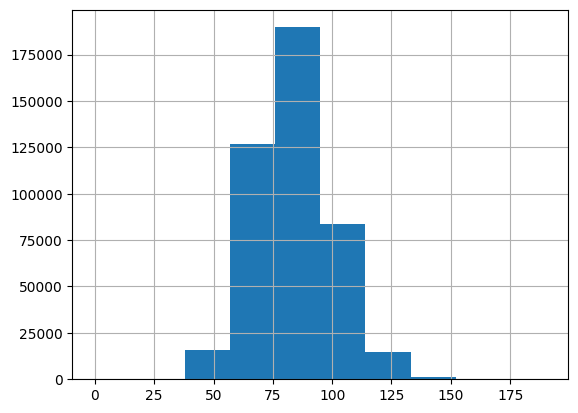

In [12]:
df['y_2'].hist()